Large Multimodal Models (LMMs)

In [1]:
import warnings
warnings.filterwarnings('ignore')

## Setup
### Load environment variables and API keys

In [2]:
  !pip install google-generativeai

In [ ]:
import os
from dotenv import load_dotenv, find_dotenv

_ = load_dotenv(find_dotenv())
GOOGLE_API_KEY=os.getenv('GOOGLE_API_KEY')

In [6]:
import google.generativeai as genai
from google.api_core.client_options import ClientOptions

genai.configure(
        api_key=GOOGLE_API_KEY,
        transport="rest",
        client_options=ClientOptions(
            api_endpoint=os.getenv("GOOGLE_API_BASE"),
        ),
)

## Helper functions

In [7]:
import textwrap
import PIL.Image
from IPython.display import Markdown, Image

def to_markdown(text):
    text = text.replace('•', '  *')
    return Markdown(textwrap.indent(text, '> ', predicate=lambda _: True))


* Function to call LMM (Large Multimodal Model).

In [8]:
def call_LMM(image_path: str, prompt: str) -> str:
    img = PIL.Image.open(image_path)

    model = genai.GenerativeModel('gemini-pro-vision')
    response = model.generate_content([prompt, img], stream=True)
    response.resolve()

    return to_markdown(response.text)

## Analyze images with an LMM

In [9]:
Image(url= "GPT.png")

In [10]:
call_LMM("GPT.png",
    "Explain what you see in this image.")

>  The image shows the architecture of a Transformer model, which is a type of neural network that is used for machine translation and other natural language processing tasks. 
> 
> The model consists of two parts: an encoder and a decoder. The encoder converts the input sequence into a fixed-length vector, and the decoder uses this vector to generate the output sequence. 
> 
> The encoder and decoder are both made up of multiple layers of Transformer blocks. Each Transformer block consists of a self-attention layer and a feed-forward layer. The self-attention layer allows the model to attend to different parts of the input sequence, and the feed-forward layer allows the model to learn relationships between the different parts of the input sequence.
> 
> The Transformer model is a powerful and versatile model that has achieved state-of-the-art results on a variety of natural language processing tasks.

## Decode the hidden message

In [11]:
Image(url= "images.png")

In [12]:
call_LMM("images.png",
    "Read what you see on this image.")

>  This is a green square.

In [16]:
import matplotlib.pyplot as plt

In [17]:
def create_image_with_text(text, font_size=20, font_family='sans-serif', text_color='#73D955', background_color='#7ED957'):
    fig, ax = plt.subplots(figsize=(5, 5))
    fig.patch.set_facecolor(background_color)
    ax.text(0.5, 0.5, text, fontsize=font_size, ha='center', va='center', color=text_color, fontfamily=font_family)
    ax.axis('off')
    plt.tight_layout()
    return fig

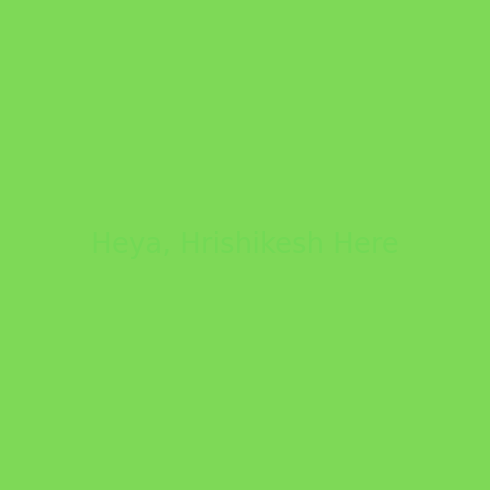

In [18]:
fig = create_image_with_text("Heya, Hrishikesh Here")
plt.show()
fig.savefig("extra_output_image.png")

In [19]:
call_LMM("extra_output_image.png",
    "Read what you see on this image.")

>  "Hey, Hrishikesh Here"

In [22]:
import imageio
import numpy as np

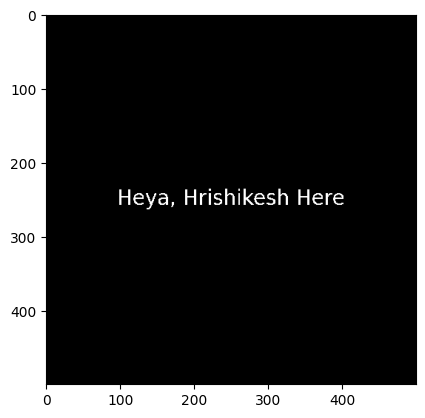

In [23]:
image = imageio.imread("extra_output_image.png")

image_array = np.array(image)

plt.imshow(np.where(image_array[:,:,0]>120, 0,1), cmap='gray');